In [31]:
import pandas as pd
import warnings
import numpy as np

In [32]:
merged_data = pd.read_csv('gait_merge_new.csv', low_memory=False)


In [33]:
merged_data['GRF_metadata.CLASS_LABEL'] = merged_data['GRF_metadata.CLASS_LABEL'].replace({'C': 1, 'K': 1, 'H': 1, 'A': 1})

merged_data['GRF_metadata.CLASS_LABEL'] = merged_data['GRF_metadata.CLASS_LABEL'].replace({'HC': 0})

In [34]:
merged_data.head()

,SUBJECT_ID,SESSION_ID,TRIAL_ID,F_V_PRO_1,F_V_PRO_2,F_V_PRO_3,F_V_PRO_4,F_V_PRO_5,F_V_PRO_6,F_V_PRO_7,...,GRF_metadata.AGE,GRF_metadata.BODY_WEIGHT,GRF_metadata.BODY_MASS,GRF_metadata.SHOD_CONDITION,GRF_metadata.SPEED,GRF_metadata.READMISSION,GRF_metadata.SESSION_TYPE,GRF_metadata.TRAIN,GRF_metadata.TRAIN_BALANCED,GRF_metadata.TEST
0,510,413,1,0.022642,0.066304,0.123147,0.178585,0.229816,0.286079,0.353620,...,47,1104.9,112.6,1,2,0,1,1,0,0
1,510,413,2,0.022637,0.063175,0.114420,0.163122,0.207777,0.257460,0.317920,...,47,1104.9,112.6,1,2,0,1,1,0,0
2,510,413,3,0.022628,0.066277,0.123461,0.178248,0.225705,0.274257,0.330758,...,47,1104.9,112.6,1,2,0,1,1,0,0
3,510,413,4,0.022641,0.067567,0.130535,0.199452,0.267539,0.337289,0.411577,...,47,1104.9,112.6,1,2,0,1,1,0,0
4,510,413,6,0.022629,0.065415,0.122248,0.179967,0.232711,0.285586,0.346265,...,47,1104.9,112.6,1,2,0,1,1,0,0


In [35]:
merged_data.isnull().sum()

SUBJECT_ID                     0
SESSION_ID                     0
TRIAL_ID                       0
F_V_PRO_1                      0
F_V_PRO_2                      0
                              ..
GRF_metadata.READMISSION       0
GRF_metadata.SESSION_TYPE      0
GRF_metadata.TRAIN             0
GRF_metadata.TRAIN_BALANCED    0
GRF_metadata.TEST              0
Length: 116, dtype: int64

In [36]:
merged_data.shape

(75732, 116)

In [37]:
merged_data['GRF_metadata.CLASS_LABEL'].unique()


array([1, 0], dtype=int64)

In [38]:
X = merged_data.drop(columns=['GRF_metadata.CLASS_LABEL', 'GRF_metadata.CLASS_LABEL_DETAILED', 'SUBJECT_ID', 'SESSION_ID'])  # Features

y = merged_data['GRF_metadata.CLASS_LABEL']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score


X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

In [43]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=X_train_reshaped.shape[1:], padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8984 - loss: 0.3896 - val_accuracy: 0.8934 - val_loss: 0.2648
Epoch 2/10
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9013 - loss: 0.2540 - val_accuracy: 0.9066 - val_loss: 0.2254
Epoch 3/10
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9110 - loss: 0.2187 - val_accuracy: 0.9190 - val_loss: 0.2048
Epoch 4/10
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9170 - loss: 0.1971 - val_accuracy: 0.9175 - val_loss: 0.1850
Epoch 5/10
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9205 - loss: 0.1819 - val_accuracy: 0.9135 - val_loss: 0.1811
Epoch 6/10
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9248 - loss: 0.1694 - val_accuracy: 0.9323 - val_loss: 0.1725
Epoch 7/10
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9293 - loss: 0.1602 - val_accuracy: 0.9304 - val_loss: 0.1526
Epoch 8/10
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9322 - loss: 0.1

474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


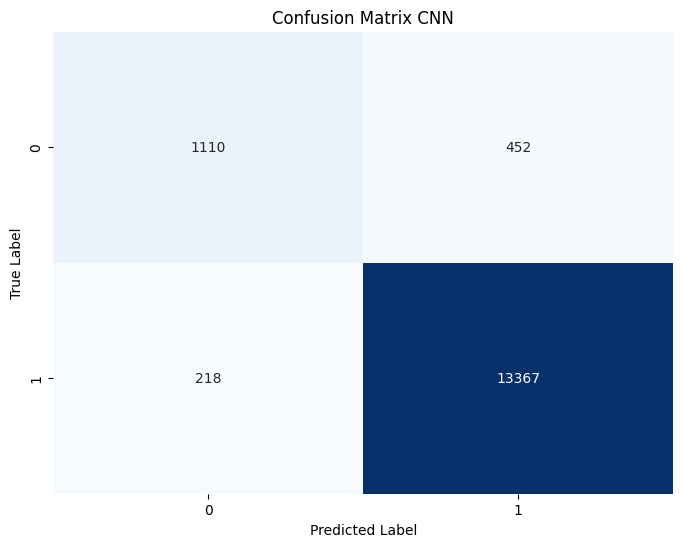

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions for the test data
y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_classifier_complex = KNeighborsClassifier(n_neighbors=100)

# Train the model
knn_classifier_complex.fit(X_train, y_train)

# Make predictions on the test set
y_pred_complex = knn_classifier_complex.predict(X_test)

# Calculate accuracy
accuracy_complex = accuracy_score(y_test, y_pred_complex)
print("Accuracy (Complex KNN):", accuracy_complex)


Accuracy (Complex KNN): 0.9028850597478049


Confusion Matrix (Complex KNN):
 [[  185  1377]
 [   94 13491]]


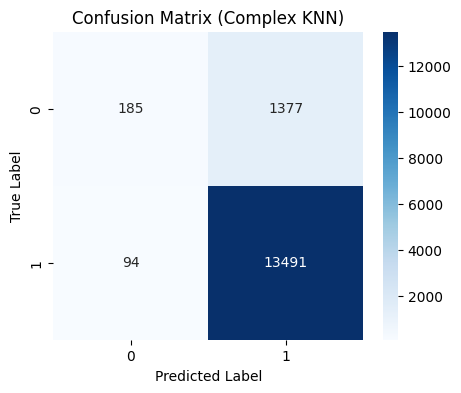

In [17]:
conf_matrix_complex = confusion_matrix(y_test, y_pred_complex)
print("Confusion Matrix (Complex KNN):\n", conf_matrix_complex)

# Plot the confusion matrix with a smaller figure size
plt.figure(figsize=(5, 4))  # Adjust the figure size as needed
sns.heatmap(conf_matrix_complex, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Complex KNN)')
plt.show()

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler to normalize the features
scaler = StandardScaler()
# Fit the scaler to the training data and transform it to have zero mean and unit variance
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(C=0.1, kernel='sigmoid')  
svm_model.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with SVM :", accuracy)

Accuracy with SVM : 0.876609229550406


Confusion Matrix:
 [[  506  1056]
 [  813 12772]]


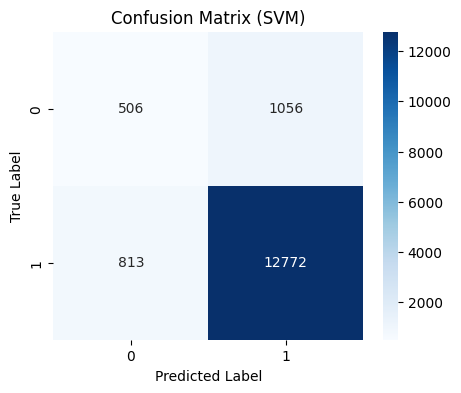

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix with a smaller figure size
plt.figure(figsize=(5, 4))  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVM)')
plt.show()


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize logistic regression model with L2 regularization
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9094210074602231


C:\Users\Anushka\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Confusion Matrix:
 [[  206  1356]
 [   16 13569]]


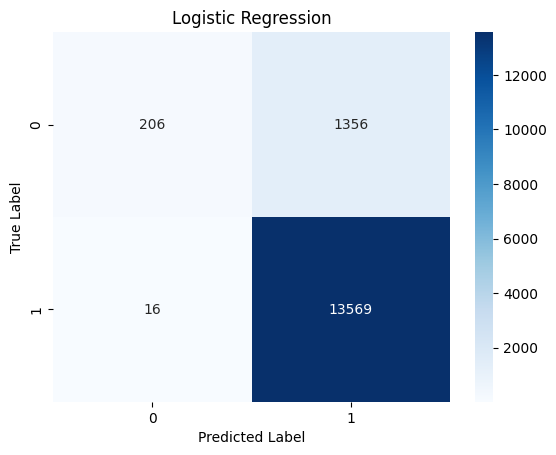

In [16]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression')
plt.show()